In [20]:
import pandas as pd
import numpy as np
import thinkplot
import thinkstats2
import math

In [4]:
#Load data, loose the excess
df = pd.read_csv('MSFT.csv')
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2018-01-01,88.190002
1,2018-01-08,89.599998
2,2018-01-15,90.000000
3,2018-01-22,94.059998
4,2018-01-29,91.779999


In [7]:
#Do a little manipulation to get the return
df['diff'] = pd.Series(np.diff(df['Close']))
df['return'] = df['diff']/df['Close']
df = df[['Date', 'return']].dropna()
df.head()

,Date,return
0,2018-01-01,0.015988
1,2018-01-08,0.004464
2,2018-01-15,0.045111
3,2018-01-22,-0.024240
4,2018-01-29,-0.039224


Our new table is the daily return - i.e. if we invested in MSFT one day, what would the return be from my investment from one day to the next. 

The first two days can be taken as an example:
    - From day 1 to day 2 the price goes up apx $1.4
    - $1.4 dollars is approximately 1.6% of the first day price - ~$88
    - So if you invested on day one, you'd gain about 1.6%, or .016 <- That's the return value. 

We can do some of our graphing to take a little look-see and try to determine if this new distribution is normal:

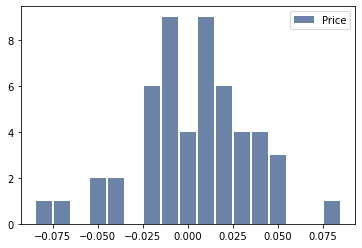

In [27]:
#Histogram
hi = thinkstats2.Hist(round(df["return"], 2), label="Price")
thinkplot.Hist(hi)
thinkplot.Config()

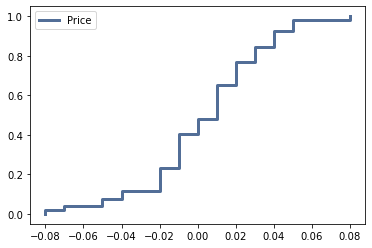

In [41]:
#CDF look
hi_c = thinkstats2.Cdf(hi)
thinkplot.Cdf(hi_c)
thinkplot.Config()

These charts look semi-normal, but not totally. Examine the probability plot to see it a bit closer. 

The thinkstats2 file provides this easy to use probability plot function. The book (pg 63ish) has the steps to make this broken out a little bit more. 

The most simple way I can think of to explain it is that it compares if the middle values are near the mean, the low values are near the low, and the high values are near the high. The model line is what we'd expect if the data was perfectly normal, in this one the middle values are close, the low values are a little lower than expected, the high values are a little lower than expected. 

In English, it is more or less normal for values close to the mean, but the values (the actual % return values) on either end of the distribution are a bit lower than we'd expect if it was normal. 

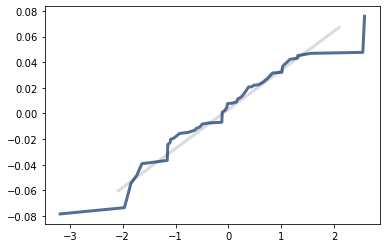

In [31]:
#Create probability plot
thinkstats2.NormalProbabilityPlot(df["return"])


Does it match the line? Is it normal? Ehhhhh.... kind of. The highest and lowest values are both lower than expected. For values near the mean, it is pretty close. 

We can live on the wild side, assume that it is close enough to normal, and 'use' that normality to do some stuff. 

One of the super useful things about these analytical distributions is the simplicity. A normal curve is always the same basic shape, so all we need to do to create one is to know the mean (mu) and standard deviation (sigma). This allows us to easily extrapolate from what we know, and use all the attributes of the normal distribution. Again, this is an approximation, it is not bang on, but that is useful in a lot of cases. 

In [51]:
#Create a normal distribution based on the characteristics of the kinda-normal data
import scipy.stats
mu = df["return"].mean()
sigma = df["return"].std()
cdf = scipy.stats.norm(mu, sigma)

In [52]:
#How many daily returns are greater than .5%, but less than 1%?
lowVal = cdf.cdf(.05)
hiVal = cdf.cdf(.1)
print(str(lowVal) + " : " + str(hiVal))

0.9355110908938288 : 0.9991544890514654


We can try another one - 

In [55]:
import hinc
df_pop = hinc.readData()
df_pop.head()

ModuleNotFoundError: No module named 'hinc'